In [1]:
import pandas as pd 

In [2]:
raw_data = pd.read_csv(r'C:\Users\Malek\Documents\DataScientist\model linieare\datasets\TP_2_datset_mushrooms.csv')

In [3]:
raw_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
# Les données sont sous forme des lettres donc on doit les transformer en chiffre
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [8]:
for col in raw_data.columns:
    raw_data[col] = labelencoder.fit_transform(raw_data[col])

raw_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [13]:
X = raw_data.iloc[:,1:23]
y = raw_data.iloc[:,0]

In [14]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train , y_test = train_test_split(X, y , test_size = 0.3)

#  logistic Regression 

In [18]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train , y_train)

C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [22]:
y_prob = lr.predict_proba(X_test)[:,1] 

In [24]:
from sklearn import metrics
[fpr,tpr,thr] = metrics.roc_curve(y_test , y_prob)

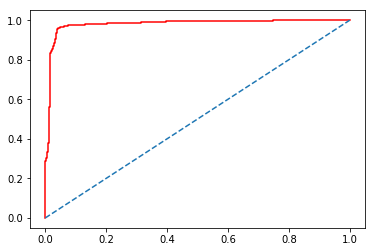

In [28]:
import matplotlib.pyplot as plt 
plt.plot(fpr , tpr , color ="red")
plt.plot([0,1],[0,1],linestyle ='--')
plt.show()

In [31]:
metrics.auc(fpr , tpr)

0.9800504769703036

In [33]:
#on cherche le mielleurs hyperparametre qu a les meilleurs resultats
import numpy as np
from sklearn.model_selection import GridSearchCV
params = {'C' : np.logspace(-3,3,10),'penalty' : ['l1','l2'] }
glr = GridSearchCV(lr , params , cv=10)

In [34]:
#model
glr.fit(X_train , y_train)

C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
glr.best_params_

{'C': 1000.0, 'penalty': 'l2'}

In [37]:
y_prob = glr.predict_proba(X_test)[:,1] 
[fpr,tpr,thr] = metrics.roc_curve(y_test , y_prob)

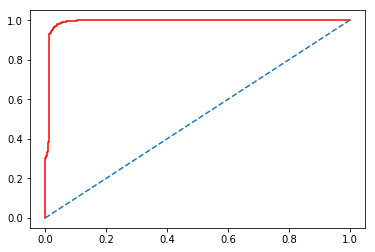

In [38]:
plt.plot(fpr , tpr , color ="red")
plt.plot([0,1],[0,1],linestyle ='--')
plt.show()

In [39]:
metrics.auc(fpr , tpr)

0.9907968824237032

# SVM  Regression 

In [40]:
from sklearn.svm import LinearSVC
svm = LinearSVC()
params = {'C' : np.logspace(-3,3,10)}
gsvm = GridSearchCV(lr , params , cv=10)

In [41]:
gsvm.fit(X_train , y_train)

C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Malek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-03, 4.64159e-03, 2.15443e-02, 1.00000e-01, 4.64159e-01,
       2.15443e+00, 1.00000e+01, 4.64159e+01, 2.15443e+02, 1.00000e+03])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
gsvm.best_params_

{'C': 1000.0}

In [44]:
y_prob = gsvm.predict(X_test)
[fpr,tpr,thr] = metrics.roc_curve(y_test , y_prob)

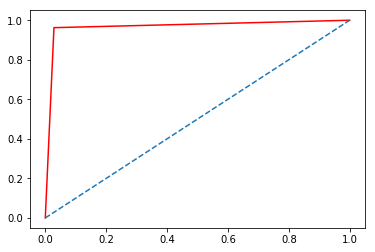

In [45]:
plt.plot(fpr , tpr , color ="red")
plt.plot([0,1],[0,1],linestyle ='--')
plt.show()

In [46]:
metrics.auc(fpr , tpr)

0.9670154227698986